In [1]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
path=Path('data')

In [3]:
path.ls()

[PosixPath('data/Anno'),
 PosixPath('data/img.zip'),
 PosixPath('data/img'),
 PosixPath('data/models'),
 PosixPath('data/trained_model_resnet50_4_epoch_train_whole.pkl')]

In [4]:
f=open(path/"Anno/list_category_cloth.txt", "r")
contents =f.read().splitlines()
print(contents)


['50', 'category_name  category_type', 'Anorak         1', 'Blazer         1', 'Blouse         1', 'Bomber         1', 'Button-Down    1', 'Cardigan       1', 'Flannel        1', 'Halter         1', 'Henley         1', 'Hoodie         1', 'Jacket         1', 'Jersey         1', 'Parka          1', 'Peacoat        1', 'Poncho         1', 'Sweater        1', 'Tank           1', 'Tee            1', 'Top            1', 'Turtleneck     1', 'Capris         2', 'Chinos         2', 'Culottes       2', 'Cutoffs        2', 'Gauchos        2', 'Jeans          2', 'Jeggings       2', 'Jodhpurs       2', 'Joggers        2', 'Leggings       2', 'Sarong         2', 'Shorts         2', 'Skirt          2', 'Sweatpants     2', 'Sweatshorts    2', 'Trunks         2', 'Caftan         3', 'Cape           3', 'Coat           3', 'Coverup        3', 'Dress          3', 'Jumpsuit       3', 'Kaftan         3', 'Kimono         3', 'Nightdress     3', 'Onesie         3', 'Robe           3', 'Romper         3', '

In [5]:
num_classes = int(contents[0])
print(num_classes)

50


In [6]:
classes = []
for i in range(2,len(contents)):
    classes.append(contents[i].split(" ")[0])
print(classes)

['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Flannel', 'Halter', 'Henley', 'Hoodie', 'Jacket', 'Jersey', 'Parka', 'Peacoat', 'Poncho', 'Sweater', 'Tank', 'Tee', 'Top', 'Turtleneck', 'Capris', 'Chinos', 'Culottes', 'Cutoffs', 'Gauchos', 'Jeans', 'Jeggings', 'Jodhpurs', 'Joggers', 'Leggings', 'Sarong', 'Shorts', 'Skirt', 'Sweatpants', 'Sweatshorts', 'Trunks', 'Caftan', 'Cape', 'Coat', 'Coverup', 'Dress', 'Jumpsuit', 'Kaftan', 'Kimono', 'Nightdress', 'Onesie', 'Robe', 'Romper', 'Shirtdress', 'Sundress']


In [7]:
f=open(path/"Anno/list_category_img.txt", "r")
labels_content =f.read().splitlines()

In [8]:
labels = []
for i in range(2,len(labels_content)):
    labels.append(labels_content[i].split())
print(labels[0:2])

[['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg', '3'], ['img/Sheer_Pleated-Front_Blouse/img_00000002.jpg', '3']]


In [9]:
labels_df = pd.DataFrame(labels)
labels_df.rename(columns = {0:'filename',1:'label'}, inplace = True) 
labels_df.head()

,filename,label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [10]:
trained_labels = labels_df.groupby('label').apply(lambda x: x.sample(n=1000, replace=True))

In [11]:
trained_labels.shape

(46000, 2)

In [12]:
data=ImageDataBunch.from_df(path=path/"", df=trained_labels, valid_pct=0.2, fn_col='filename', label_col='label', 
                            ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

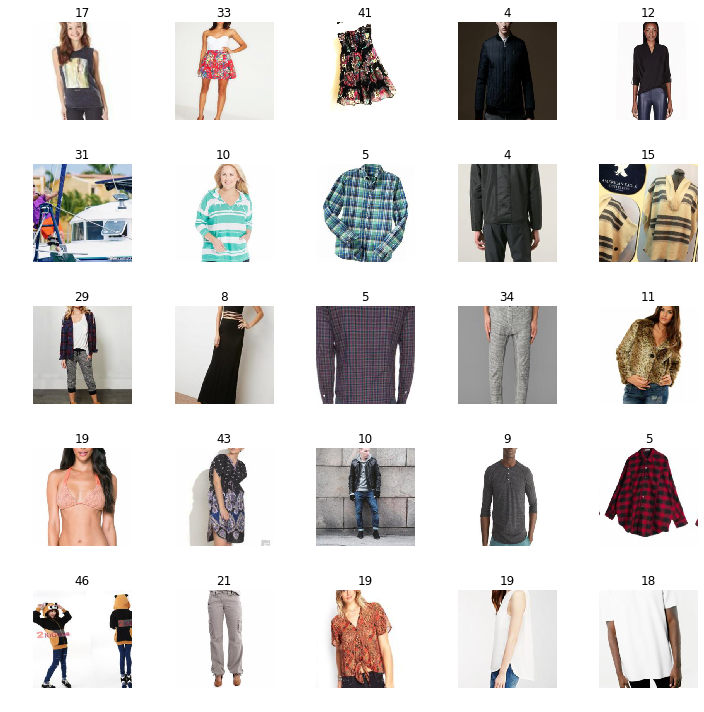

In [13]:
data.show_batch(figsize=(10,10))

In [14]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy)

In [15]:
learn.freeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


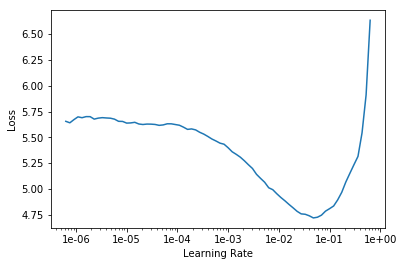

In [17]:
learn.recorder.plot()

In [18]:
lr=1e-2
learn.fit_one_cycle(10, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.111657,1.692835,0.522935,06:24
1,1.847618,1.569004,0.545217,06:26
2,1.704519,1.477421,0.569565,06:25
3,1.593860,1.413641,0.586413,06:25
4,1.449813,1.323854,0.613152,06:25
5,1.365970,1.194248,0.651087,06:25
6,1.191573,1.119026,0.665543,06:25
7,1.122993,1.050727,0.688043,06:26
8,1.019833,1.026563,0.699022,06:28
9,0.964266,1.023514,0.695870,06:28


In [19]:
interp=ClassificationInterpretation.from_learner(learn)

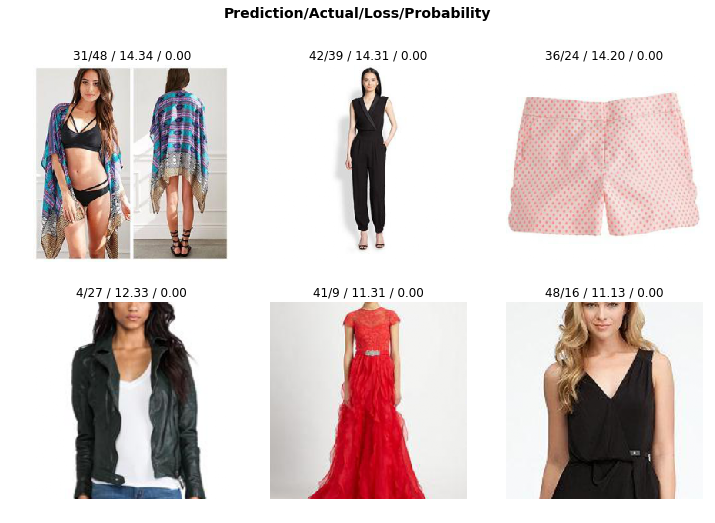

In [20]:
interp.plot_top_losses(k=6, figsize=(12, 8))

In [21]:
learn.save("trained_model_resnet50_8epoch_50k")

## Showing results

In [22]:
with torch.no_grad():
    x,y = next(iter(learn.data.valid_dl))
    yhat = learn.model(x.to('cuda'))

In [23]:
x.shape, y[0].shape, yhat.shape

(torch.Size([64, 3, 256, 256]), torch.Size([]), torch.Size([64, 46]))